In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from math import sqrt
from sklearn.model_selection import train_test_split

np.random.seed(123)

%matplotlib inline

In [2]:
def load_img(file_name):
    # open the image
    img = Image.open(f'{data_root}/{file_name}')
    # convert to grayscale to have a single dimension
    gray_scale = ImageOps.grayscale(img)
    # convert to numpy
    arr = np.asarray(gray_scale)
    # convert to a single vector
    arr = arr.flatten()
    # convert to floats instead of uint8
    return arr.astype('float64')

Load data

In [12]:
#data_root = 'data/train_1000_10'
data_root = 'data/train_700_28'
#data_root = 'data/train_1000_28'

truth_file = f'{data_root}/truth.dsv'

In [13]:
# load data
dataset = np.genfromtxt(truth_file, delimiter=':', dtype=np.dtype('<U12'), encoding='utf-8')
files, labels = np.split(dataset, 2, 1)
# flatten to a single vector
labels = labels.flatten()
files = files.flatten()

print(f'Labels shape: {labels.shape}')
print(f'Files shape: {files.shape}')

Labels shape: (700,)
Files shape: (700,)


In [14]:
def load_img(file_name):
    # open the image
    img = Image.open(f'{data_root}/{file_name}')
    # convert to grayscale to have a single dimension
    gray_scale = ImageOps.grayscale(img)
    # convert to numpy
    arr = np.asarray(gray_scale, dtype='float64')
    # convert to a single vector
    return arr.flatten()

In [15]:
# load image as a single vector
images = np.array(list(map(load_img, files)))

print(f'Images shape: {images.shape}')
samples, image_pixels = images.shape
print(f'Samples: {samples}x')
# we assume that the images are squares
image_size = int(sqrt(image_pixels))
print(f'Image size: {image_size}px')

Images shape: (700, 784)
Samples: 700x
Image size: 28px


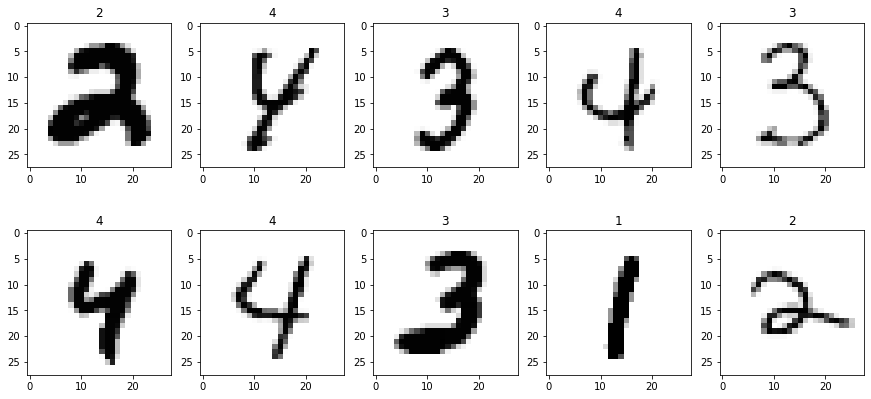

In [16]:
to_plot = 10
per_row = 5
fig = plt.figure(figsize=(15, 7))
for i in range(to_plot):
    ax = fig.add_subplot(int(to_plot / per_row), per_row, i+1)

    sample_idx = np.random.randint(0, len(images))
    img = images[sample_idx]
    img_size = int(sqrt(img.shape[0]))
    
    ax.title.set_text(labels[sample_idx])
    
    plt.imshow(img.reshape((img_size, img_size)), cmap='gray')
    
plt.show()

In [21]:
class kNN():
    def __init__(self, values, labels):
        self.values = values
        self.labels = labels

    def euclidean_distance(self, X):
        # input: matrix of data points
        n_samples, _ = X.shape
        l2 = [np.sqrt(np.sum((self.values - X[i])**2, axis=1)) for i in range(n_samples)]
        return np.array(l2)

    def predict(self, X, k=1):
        # step 1: compute distance between input and training data
        dists = self.euclidean_distance(X)

        # step 2: find the k nearest neighbors and their classifications
        knn = np.argsort(dists)[:, :k]
        y_knn = self.labels[knn]
            
        n_samples, _ = X.shape
        max_votes = [max(y_knn[i], key=list(y_knn[i]).count) for i in range(n_samples)]
        return max_votes

In [23]:
X_train, X_test, y_train, y_test = train_test_split(images, labels)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (525, 784)
y_train shape: (525,)
X_test shape: (175, 784)
y_test shape: (175,)


In [26]:
knn = kNN(X_train, y_train)

print("Testing one datapoint, k=1")
print(f"Predicted label: {knn.predict(X_test[0:1], k=1)}")
print(f"True label: {y_test[0:1]}")
print()
print("Testing one datapoint, k=5")
print(f"Predicted label: {knn.predict(X_test[20:21], k=5)}")
print(f"True label: {y_test[20:21]}")
print()
print("Testing 10 datapoint, k=1")
print(f"Predicted labels: {knn.predict(X_test[5:15], k=1)}")
print(f"True labels: {y_test[5:15]}")
print()
print("Testing 10 datapoint, k=4")
print(f"Predicted labels: {knn.predict(X_test[5:15], k=5)}")
print(f"True labels: {y_test[5:15]}")
print()

Testing one datapoint, k=1
Predicted label: ['3']
True label: ['3']

Testing one datapoint, k=5
Predicted label: ['2']
True label: ['2']

Testing 10 datapoint, k=1
Predicted labels: ['2', '4', '5', '5', '4', '2', '5', '2', '3', '4']
True labels: ['2' '5' '5' '5' '4' '2' '5' '2' '3' '4']

Testing 10 datapoint, k=4
Predicted labels: ['2', '4', '5', '5', '4', '1', '5', '2', '3', '4']
True labels: ['2' '5' '5' '5' '4' '2' '5' '2' '3' '4']



In [31]:
def get_precision(predicted, labels):
    return np.sum(predicted == labels) / len(predicted) * 100

In [30]:
# Compute accuracy on test set
y_p_test1 = knn.predict(X_test, k=1)


print(f"Test accuracy with k = 1: {get_precision(y_p_test1, y_test)}")

y_p_test5 = knn.predict(X_test, k=5)
print(f"Test accuracy with k = 5: {get_precision(y_p_test5, y_test)}")

Test accuracy with k = 1: 88.57142857142857
Test accuracy with k = 5: 84.0
